Here is the original code
``` python
import math
def kalman_predict(d, b, m):
    d_prime = law_of_cosines_b(d, m, b)
    b_prime = math.pi - law_of_sines_A(d, b, d_prime)
    return d_prime, b_prime

def law_of_sines_A(a, B, b):
    return (math.asin((a * math.sin(B)) / b)) 

def law_of_cosines_b(a, c, B):
    return(math.sqrt(a**2 + c**2 - 2*a*c*math.cos(B)))
```
But I rewrote it using standard a,b,c,A,B,C variables to make it easier to understand.
It works now but you need to rescale the b_prime variable (subtracting pi if it is above math.pi/2)
and 

-1.1197695149986342


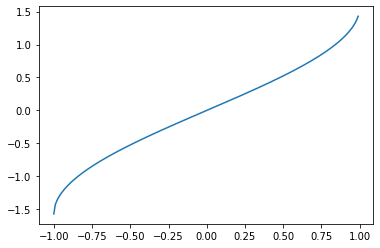

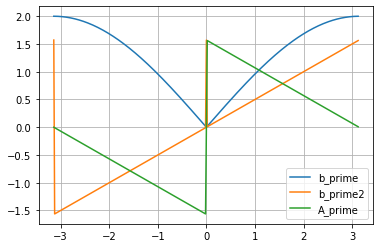

In [76]:
def kalman_predict(a, B, c):
    b_prime = law_of_cosines_b(a, c, B)
    A_prime = law_of_sines_A(a,B,b_prime) if b_prime>0 else 0
    b_prime2 = rerange(math.pi/2 - A_prime)
    return b_prime, b_prime2, A_prime

def law_of_sines_A(a, B, b):
    """ returns angle A given sides a,b and angle B"""
    return (math.asin((a * math.sin(B)) / b)) 

def law_of_cosines_b(a, c, B):
    """ returns side b given sides a,c and angle B"""
    return(math.sqrt(a**2 + c**2 - 2*a*c*math.cos(B)))

def rerange(x):
    if (x >math.pi/2):
        x = x-math.pi
    return x

import matplotlib.pyplot as plt
data = [kalman_predict(1,x/180*math.pi,1) for x in range(-180,180)]
asindata = [math.asin(x/100) for x in [-100,100]]
plt.plot([x/100 for x in range(-100,100)],[math.asin(x/100) for x in range(-100,100)])
plt.figure()
xs = [x/180*math.pi for x in range(-180,180)]
plt.plot(xs,[d[0] for d in data],label="b_prime")
plt.plot(xs,[d[1] for d in data],label="b_prime2")
plt.plot(xs,[d[2] for d in data],label="A_prime")
#plt.plot([0,720],[-math.pi,math.pi],label="B")

#plt.plot([law_of_cosines_b(1,1,x/180*math.pi) for x in range(-360,360)], label="loc") # same as b_prime
plt.legend()
print(math.asin(-0.9))
plt.grid()
